<a href="https://www.kaggle.com/code/peremartramanonellas/template-with-sklearn-to-solve-any-class-problem?scriptVersionId=106719833" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Template to solve with minimum effort Regression & Classification Problems with SKLearn. 

I made this template to obtain a really **fast a first solution** for regression & classification problems with .csv or tabular datasets. 

It's mainly based in two functions. 
* **data_transform**: This is the one responsible to modify the dataset, and transform the data to do it usable for the model. 
 * *Null values*: By the moment only replace with the most used value in the column. 
 * *Non numeric values*: At this moment stops the treatment. In this versión the function only accepts numeric columns. 
 * *Normalize Data*.: It's possible to indicate a maximum standard desviation, and the function normalize the columns with a std bigger than the one indicated 
 
* **create_model**: I use RandomizedSearchCV to test different hyperparametres, and SKlearn selects the best one. 

Of course that it's impossible to obtain the best solution to all classfication & regression problems with this template, but is a simple place where to start, study the results and continue with more advanced tunning. 

My intention is improve the data_transform function, not only to transform data but to have a fast way to obtain information of the datasets and save time. 

**Feel free to Copy & Edit, or fork this Notebook and use at your convenience, just please upvote the notebbok if you like and use it.**



In [1]:

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    horizontal-align: middle;
}
h1 {
    text-align: center;
    background-color: AliceBlue;
    padding: 10px;
    margin: 0;
    font-family: monospace;
    color:DimGray;
    border-radius: 10px
}

h2 {
    text-align: center;
    background-color: HoneyDew;
    padding: 10px;
    margin: 0;
    font-family: monospace;
    color:DimGray;
    border-radius: 10px
}

h3 {
    text-align: center;
    background-color: MintCream;
    padding: 10px;
    margin: 0;
    font-family: monospace;
    color:DimGray;
    border-radius: 10px
}


body, p {
    font-family: monospace;
    font-size: 15px;
    color: charcoal;
}
div {
    font-size: 14px;
    margin: 0;

}

h4 {
    padding: 0px;
    margin: 0;
    font-family: monospace;
    color: purple;
}
</style>
""")

## The importance of the cross-validation
*SKLearn* offers a cross-validation implemented as a k-fold cross-validation. The number of k-fold is indicated in the cv parameter of the *RandomSearchCV*, and we can indicate it in a parameter in the **create_model** function. 
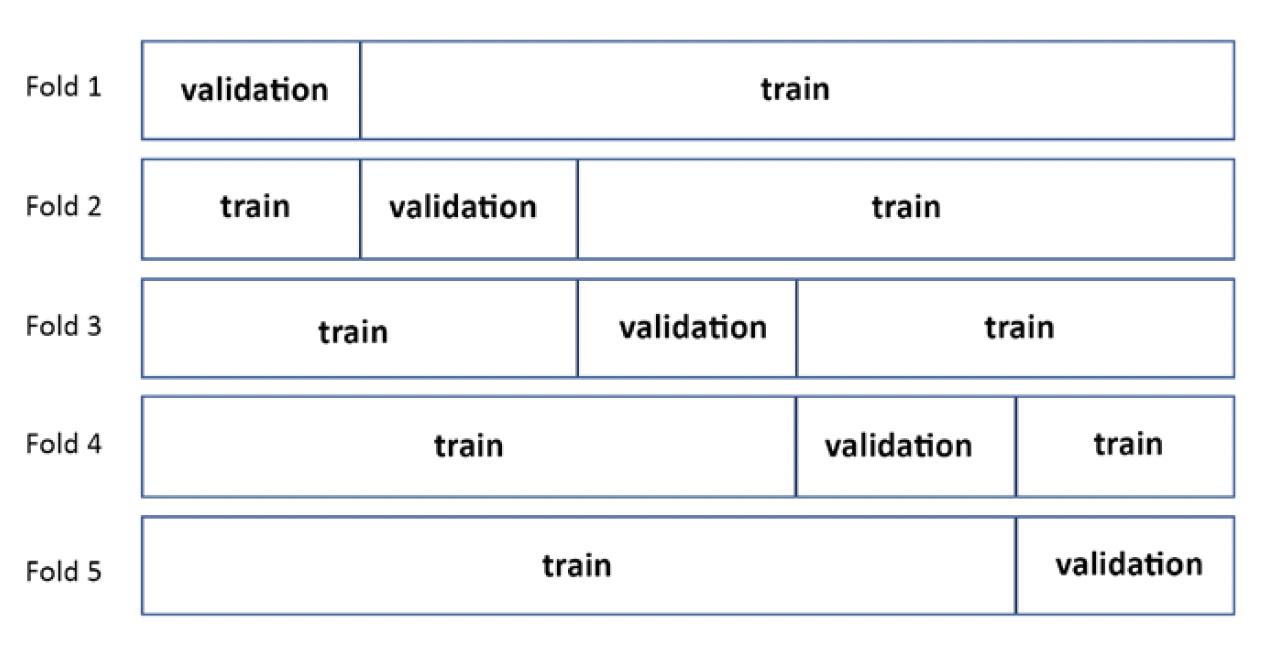
In the image, from the kaggle book, you can see how the data is structured with valuer of 5 in k. The minimun is a 2. The smaller the number more bias we can have with the test data, the model can be less well-performing that one trained with a bigger K. A Good Number should be between 5 an 10. 

## The dataset
I used the Credit Fraud Detection Dataset. 
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
It's a really imbalanced Dataset with a small representation of fraud cases. In this kind of datasets the accuracy is a useless metric. I did nothing to solve the problme of imbalanced. 

In future notebooks I will try with different Datasets. 

# Import libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Support functions. 

In [3]:
def evaluate_regression(y_true, y_preds):
    from sklearn.metrics import r2_score

    r2_score = r2_score(y_preds, y_true)

    metric_dict = {"r2_score": round(r2_score, 2)}
    print(f"KPIs-------------------------------------")
    print(f"r2: {r2_score * 100:.2f}%")
    print(f"KPIs-------------------------------------")
    return metric_dict

In [4]:
def evaluate(y_true, y_preds):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2), 
                  "precision":  round(accuracy, 2),
                  "recall": round(recall, 2),
                  "f1": round(f1, 2)}
    print(f"KPIs-------------------------------------")
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"precision: {precision * 100:.2f}%")
    print(f"recall: {recall * 100:.2f}%")
    print(f"f1score: {f1 * 100:.2f}%")
    print(f"KPIs-------------------------------------")
    return metric_dict

In [5]:
def print_confusion_matrix(y_true, y_preds):
    cm = pd.crosstab(y_true, y_preds, rownames=['Actual'], colnames=['Predicted'])
    fig, (ax1) = plt.subplots(ncols=1, figsize=(8,8))
    sns.heatmap(cm, 
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Oranges")
    plt.title('Confusion Matrix', fontsize=14)
    plt.show()

## data_transform
Transform the datased to do it usable in a Machine Learning Model. 
* **pd_dataframe**: The dataframe to check / transform. 
* **normalize**: Indicate when we want normalize. 
* **stdlimit**: If normalize is True, will normalize the columns with a *std* > to this parameter. 

In [6]:
def data_transform(pd_dataframe, normalize=False, stdlimit=2):
    
    colums_2_transform = []
    newdf = pd_dataframe.copy()
    pretestfail=False
    
    #Pre checks.    
    #This versiond don't convert Categories to Columns. TBD. 
    for dttype in dataframe.dtypes:
        if dttype == 'object':
            print ('Please, only floats or ints')
            pretestfail = True
            
    #This version have only a treatment for null values. TDB. 
    if (dataframe.isnull().sum().max()) > 0 and (not pretestfail) :
        #to be done
        pd_dataframe = pd_dataframe.apply(lambda x:x.fillna(x.value_counts().index[0]))
        #print ("You must do something with the nulls values before ;-)")
        pretestfail = True
    
    if pretestfail: 
        return nwdf

    #Normalize the values. TBD: Add more ways to change the data. 
    if normalize: 
        for n in range(len(pd_dataframe.columns)): 
            #std = pd_dataframe.take([n], axis=1).describe().loc[['std']]
            std = pd_dataframe.take([n], axis=1).describe().loc[['std', 'min', 'max']]
            if float(std.iloc[0]) > stdlimit: 
                column = pd_dataframe.columns[n]
                colums_2_transform.append(column)
                min = float(std.iloc[1])
                max = float(std.iloc[2])
                print ('min:', min)
                print ('max:', max)
                newdf[column] = (pd_dataframe[column] - min) / max - min
        print ("Columns to normalize: ", colums_2_transform)
    
    return newdf

## create_model
I use a grid to create a hyperparameters combination and RandomizedSearchCV to try different combinations. I use a small number of cross validation to reduce the training time, but it can be increased if training time is not relevant.

* **data**: The dataframe used. 
* **target**: The name of the Target Column. 
* **iterations**: How many combinations we want to try. 
* **alg**: 0 for RandomForestClassifier, 1 for RandomForestRegressor. 



In [7]:
def create_model(data, target, iterations, alg=0, cv=2):
    np.random.seed(50)
    
    pd_dataframe = data
    X = pd_dataframe.drop(target, axis=1)
    y = pd_dataframe[target]
    
    #split data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
 
    #configure values hyperparameters
    gscgrid = {'n_estimators': [10, 50, 100, 120, 150, 400], 
       'max_depth': [None, 5, 10, 20, 100], 
       'min_samples_split': [2, 4, 6, 12], 
       'min_samples_leaf': [1, 2, 4, 6, 12]}
    if alg == 0:
        model = RandomForestClassifier(n_jobs = 1)
    else: 
        model = RandomForestRegressor(n_jobs = 1)
    
    #using RandomizedSearchCV to try different hyperparameters
    #cv is crossvalidation, the default value is 5. 
    #verbose indicates the level of trace desired. 
    #https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
    gscmodel = RandomizedSearchCV(estimator=model, 
                           param_distributions=gscgrid, 
                           n_iter=iterations, 
                           cv=cv, 
                           verbose=2)
    gscmodel.fit(X_train, y_train)
    y_preds = gscmodel.predict(X_test)
    
    if alg == 0: 
        evaluate (y_test, y_preds)
    else: 
        evaluate_regression(y_test, y_preds)
    
    return gscmodel, X_train, X_test, y_train, y_test, y_preds

# USE THE TEMPLATE AND SOLVE THE PROBLEM

In [8]:
dataframe = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
dataframe.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Call the data_transform
I'm indicating a *std* limit of 5, any column with a *std*  bigger than five will be transformed.

In [9]:
pd_dataframe = data_transform(dataframe, normalize=1, stdlimit=5)

min: 0.0
max: 172792.0
min: 0.0
max: 25691.16
Columns to normalize:  ['Time', 'Amount']


In [10]:
#There are only 492 frauds. 
pd_dataframe['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

The function has transformed Two columns. *Time* and *Data*. We can see in the result of the *head* function that now the values in *Time* and *Amount* are totaly different and between 0 and 1. 

In [11]:
pd_dataframe.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724,0


## Call the create_model

Here you can change the parameters to adapt to your model. 
* data: your .csv, previously treated, without empty data and only numbers. 
* target: the dependent variable. 
* iterations: more iterations more hyperparametrers configurations will try

In [12]:
#Algorithms that can be used by the create_model function. 
CLASSIFICATION=0
REGRESSION=1

#create_model returns a tupla of values, with this constants you can acces 
#to the data inside the collection. 
MODEL = 0
XTRAIN = 1 
XTEST =2
YTRAIN =3
YTEST =4
YPREDS = 5

model = create_model(data=pd_dataframe, 
                     target = 'Class', 
                     iterations=10, 
                    alg = CLASSIFICATION, 
                    cv=3)
model[MODEL].best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=150; total time= 1.3min
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=150; total time= 1.3min
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=150; total time= 1.2min
[CV] END max_depth=10, min_samples_leaf=12, min_samples_split=6, n_estimators=10; total time=   9.9s
[CV] END max_depth=10, min_samples_leaf=12, min_samples_split=6, n_estimators=10; total time=   9.8s
[CV] END max_depth=10, min_samples_leaf=12, min_samples_split=6, n_estimators=10; total time=   9.8s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=  51.3s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=  50.8s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=  50.4s
[CV] END max_depth=20, min_samples_l

{'n_estimators': 120,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_depth': 20}

In [13]:
#In our test data we have 88 frauds. 
model[YTEST].value_counts()

0    56874
1       88
Name: Class, dtype: int64

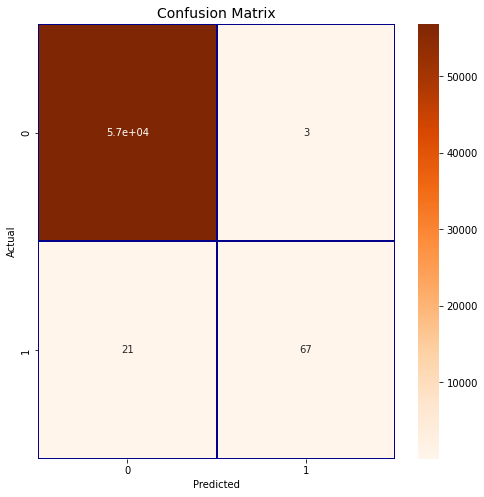

In [14]:
print_confusion_matrix(model[YTEST], model[YPREDS])

As you can see in the Confusion Matrix, we are able to detect 68 of 88 frauds. It's good?.... who knows. But our system have an xxx of accuracy, really amaziong! But, how I said just at the beginning the accuracy dosn't work with imbalanced data. We can fail all the frauds detections and obtain an fantastic accuracy. 

**Use always a confusion matrix to check the results in datasets with imbalanced data**